# Multiclass Classification

While binary classifiers are used to distinguish between two classes (e.g. detect if a transaction is a fraudulent one, classify an email into either spam or non-spam and etc.), multiclass classifiers distinguish between more than two classes. 

There are various ways that we can use to perform multiclass classification by leveraging any binary classifiers. In this exercise, you will implement two such strategies for multiclass classification: _One-versus-all_ strategy and _One-versus-one_ strategy.

- **One-versus-all (OvA)**: In this strategy, we train a single binary classifier per class, with the samples of that class as positive samples and all other samples as negatives. During inference, we get the prediction from each classifier and select the class with the highest score. This strategy is also called the one-versus-the-rest strtegey. 

- **One-versus-one (OvO)**: In this strategy, we train a binary classifier for every pair of classes. If there are N classes in the problem, you need to train N * (N-1) / 2 classifiers. During inference, we have to run through all N * (N-1) / 2 classifiers and ses which class wins the most votes. The main advantage of OvO strategy is that each binary classifier only needs to be train on the part of the training dataset for the two classes that it needs to separate. 

In [1]:
# import packages
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# make this notebook's output stable across runs
np.random.seed(0)

## Avila Dataset

In this lab assignment, we use the [Avila](https://archive.ics.uci.edu/ml/datasets/Avila) data set has been extracted from 800 images of the the "Avila Bible", a giant Latin copy of the whole Bible produced during the XII century between Italy and Spain.  
The palaeographic analysis of the  manuscript has  individuated the presence of 12 copyists. The pages written by each copyist are not equally numerous. 
Each pattern contains 10 features and corresponds to a group of 4 consecutive rows.

The prediction task consists in associating each pattern to one of the 12 copyists (labeled as: A, B, C, D, E, F, G, H, I, W, X, Y).
The data have has been normalized, by using the Z-normalization method, and divided in two data sets: a training set containing 10430 samples, and a test set  containing the 10437 samples.


In [2]:
# Load train and test data from CSV files.
# I renamed these to CSV so that I could open them in Excel and look at them.
train = pd.read_csv("avila-tr.csv", header=None)
test = pd.read_csv("avila-ts.csv", header=None)

x_train = train.iloc[:,:-1]
y_train = train.iloc[:,-1]

x_test = test.iloc[:,:-1]
y_test = test.iloc[:,-1]

In [3]:
# Output the number of images in each class in the train and test datasets.
train_images = train.shape[0]
test_images = test.shape[0]

print("Number of images in the train dataset:", train_images)
print("Number of images in the test dataset:", test_images)


Number of images in the train dataset: 10430
Number of images in the test dataset: 10437


Question 1.1: Check for missing Data

In [4]:
# Check for missing data in 'test' dataset
test_missing_data = test.isnull().sum()
print("Missing data in 'test' dataset:")
print(test_missing_data)

# Check for missing data in 'train' dataset
train_missing_data = train.isnull().sum()
print("Missing data in 'train' dataset:")
print(train_missing_data)


Missing data in 'test' dataset:
0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
dtype: int64
Missing data in 'train' dataset:
0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
dtype: int64


In [5]:
# Appears to be no missing data. Some zero values, but I am assuming that 0 is a valid value

Question 1.2: Apply Z-normalization to data

In [6]:
from sklearn.preprocessing import StandardScaler

# Create an instance of StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data
scaler.fit(x_train)
# Apply Z-normalization to the training data
x_train = scaler.transform(x_train)

scaler.fit(x_test)
# Apply Z-normalization to the test data
x_test = scaler.transform(x_test)


Question 2.1: Write a method to train multiple logistic regression models performing One vs All (OvA) classification. The method allows you to pass in training features, and target. The method returns a list of models and their associated labels. 
Within the method:
- Determine the list of classes
- Create a place to store all the models
- For each class, train a model with the target variable set to 1 and 0 for all other classes
- Return the list of models trained and associated labels.

In [7]:
def trainOvA(x, y):
    """
    TODO: Train the multiclass classifier using OvA strategy. 
    """
    labels = sorted(y.unique())
    n_labels = len(labels)
    print("number of classes is {}".format(n_labels))

    #Create model
    models = [LogisticRegression() for i in range(n_labels)]
    model_labels = [0 for i in range(n_labels)]

    for i in range(n_labels):
        label = labels[i]
        print("Train Logistic Regression model for class {}".format(label))

        # update the label according to OvA strategy
        y_train_label = y.apply(lambda x: 1 if x == label else 0)

        # Train model
        models[i].fit(x, y_train_label)
        model_labels[i] = label
    return models, model_labels

Question 2.2: Write a method that leverage the multiple models train for OvA, and outputs the majority class.

In [8]:
def predictOvA(models, labels, x):
    """
    TODO: Make predictions on multiclass problems using the OvA strategy. 
    """
    if models == None:
        sys.exit("The model has not been trained yet. Please call train() first. Exiting...")

    #Create prediction
    predictions = pd.DataFrame()
    for i in range(len(models)):
        label = labels[i]
        y_pred = models[i].predict_proba(x)[:,1]
        predictions[label] = y_pred

    return predictions.idxmax(axis=1).values

Question 2.3: Train OvA model on the Avila dataset

In [9]:
from sklearn.linear_model import LogisticRegression

# Train the multiclass classifier using OvA strategy
models, model_labels = trainOvA(x_train, y_train)


number of classes is 12
Train Logistic Regression model for class A
Train Logistic Regression model for class B
Train Logistic Regression model for class C
Train Logistic Regression model for class D
Train Logistic Regression model for class E
Train Logistic Regression model for class F
Train Logistic Regression model for class G
Train Logistic Regression model for class H
Train Logistic Regression model for class I
Train Logistic Regression model for class W
Train Logistic Regression model for class X
Train Logistic Regression model for class Y


Question 2.4: Predict and evalutate the results of your model

In [10]:
te_z_ova = predictOvA(models, model_labels, x_test)


Accuracy of OvA classifier is 0.5279294816518156.


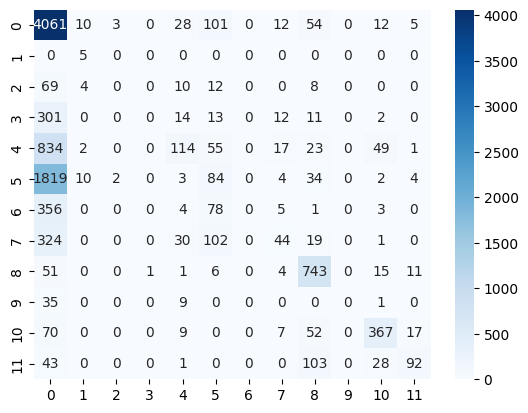

In [11]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

ova_accuracy = accuracy_score(y_test, te_z_ova)
ova_confusion_matrix = confusion_matrix(y_test, te_z_ova)

print("Accuracy of OvA classifier is {}.".format(ova_accuracy))
#print("Confusion matrix of OvA classifier: \n {}".format(ova_confusion_matrix))

sns.heatmap(ova_confusion_matrix, annot=True, fmt='', cmap='Blues')
# Show the plot
plt.show()

---

Question 3.1: Develop a method that trains a list of models based on the OvO stragety for multiclass classification using logistic regression. 

In [12]:
from itertools import combinations

def trainOvO(x, y):
    """
    TODO: Train the multiclass classifier using OvO strategy. 
    """
    labels = sorted(y.unique())
    n_labels = len(labels)
    n_models = int(len(labels) * (len(labels) - 1) / 2)
    print("number of classes is {}".format(n_labels))

    models = []
    model_labels = []
    model_idx = 0
    # This code was confusing me... went for combinations instead
    # for i in range(n_labels):
    #     for j in range(i+1, n_labels):
    for i, j in combinations(range(n_labels), 2):
            label_i = labels[i]
            label_j = labels[j]
            print(f"Train Logistic Regression model to distinguish {label_i} and {label_j}")

            # update the label according to OvA strategy
            # train_y = y[(y == label_i) | (y == label_j)]
            # train_x = x.loc[train_y.index]
            idx_i = y == label_i
            idx_j = y == label_j
            train_idx = idx_i | idx_j
            train_x = x[train_idx]
            train_y = y[train_idx]

            # construct the logistic regression instance
            lr = LogisticRegression(solver = 'liblinear')
            #don't forget to fit
            lr.fit(train_x, train_y)
            model_labels.append((label_i, label_j))
            models.append(lr)
        
    return models, model_labels

Question 3.2: Write a method that leverage the multiple models train for OvO, and outputs the majority class.

In [13]:
def predictOvO(models, labels, x):
    """
    TODO: Make predictions on multiclass problems using the OvO strategy. 
    """
    if models == None:
        sys.exit("The model has not been trained yet. Please call train() first. Exiting...")

    n_models = len(models)
    predictions = pd.DataFrame()
    for i in range(n_models):
        label = labels[i]
        y_pred = models[i].predict(x)
        predictions[label] = y_pred
    

    return predictions.mode(axis=1).iloc[:, 0].values

Question 3.3: Train OvO model on the Avila dataset

In [14]:
models, labels = trainOvO(x_train, y_train)

number of classes is 12
Train Logistic Regression model to distinguish A and B
Train Logistic Regression model to distinguish A and C
Train Logistic Regression model to distinguish A and D
Train Logistic Regression model to distinguish A and E
Train Logistic Regression model to distinguish A and F
Train Logistic Regression model to distinguish A and G
Train Logistic Regression model to distinguish A and H
Train Logistic Regression model to distinguish A and I
Train Logistic Regression model to distinguish A and W
Train Logistic Regression model to distinguish A and X
Train Logistic Regression model to distinguish A and Y
Train Logistic Regression model to distinguish B and C
Train Logistic Regression model to distinguish B and D
Train Logistic Regression model to distinguish B and E
Train Logistic Regression model to distinguish B and F
Train Logistic Regression model to distinguish B and G
Train Logistic Regression model to distinguish B and H
Train Logistic Regression model to distin

Question 3.4: Predict and evalutate the results of your model

In [15]:
te_z_ovo = predictOvO(models, labels, x_test)

Accuracy of OvO classifier is 0.546133946536361.


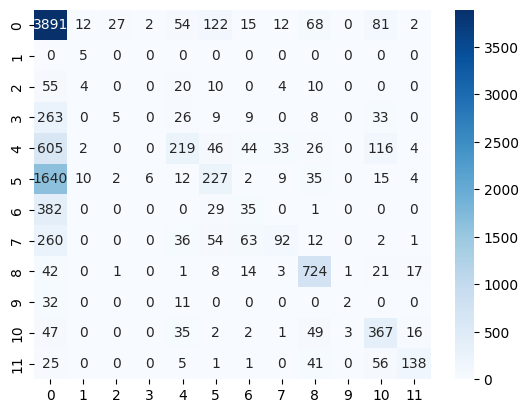

In [16]:

ovo_accuracy = accuracy_score(y_test, te_z_ovo)
ovo_confuction_matrix = confusion_matrix(y_test, te_z_ovo)


print("Accuracy of OvO classifier is {}.".format(ovo_accuracy))
# print("Confusion matrix of OvO classifier: \n {}".format(ovo_confuction_matrix))
sns.heatmap(ovo_confuction_matrix, annot=True, fmt='', cmap='Blues')
# Show the plot
plt.show()

Question 4.1: [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) within sklearn supports two approaches for solving multi-class problems: 'ovr', 'multinomial'. Try out both approaches, and evaluate compare the performance agains what you developed in questions 2 and 3.

Accuracy of Sklearn OvR classifier is 0.5279294816518156.


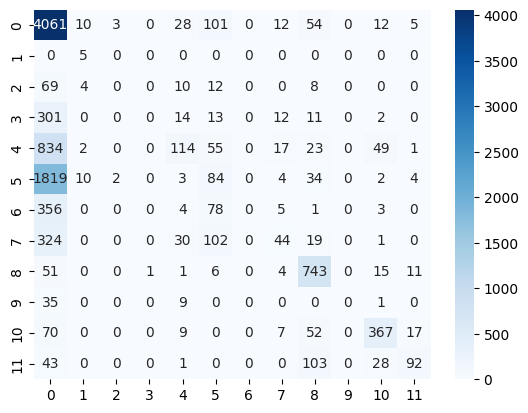

In [17]:
clf = LogisticRegression(multi_class='ovr').fit(x_train, y_train)
y_ovr = clf.predict(x_test)

ovr_accuracy_sklearn = accuracy_score(y_test, y_ovr)
ovr_confuction_matrix = confusion_matrix(y_test, y_ovr)

print("Accuracy of Sklearn OvR classifier is {}.".format(ovr_accuracy_sklearn))
#print("Confusion matrix of OvR classifier: \n {}".format(ovr_confuction_matrix))
sns.heatmap(ovr_confuction_matrix, annot=True, fmt='', cmap='Blues')
# Show the plot
plt.show()

Accuracy of Sklearn OvO classifier is 0.5406726070709974.


C:\Users\louis\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


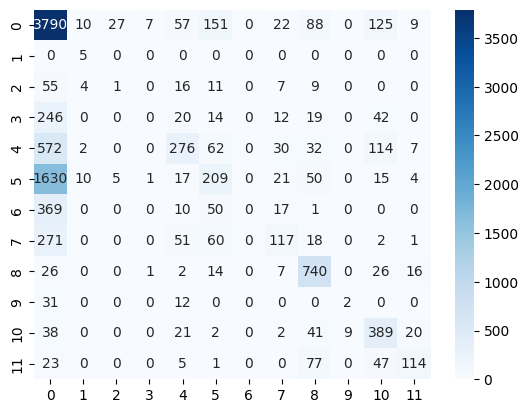

In [18]:
#class = multinomial
clf = LogisticRegression(multi_class='multinomial').fit(x_train, y_train)
y_multinomial = clf.predict(x_test)

multinomial_accuracy_sklearn = accuracy_score(y_test, y_multinomial)
multinomial_confuction_matrix = confusion_matrix(y_test, y_multinomial)

print("Accuracy of Sklearn OvO classifier is {}.".format(multinomial_accuracy_sklearn))
#print("Confusion matrix of OvO classifier: \n {}".format(multinomial_confuction_matrix))
sns.heatmap(multinomial_confuction_matrix, annot=True, fmt='', cmap='Blues')
# Show the plot
plt.show()

Question 4: Create a new text cell in your Notebook: Complete a 50-100 word summary (or short description of your thinking in applying this week's learning to the solution) of your experience in this assignment. Include: What was your incoming experience with this model, if any? what steps you took, what obstacles you encountered. how you link this exercise to real-world, machine learning problem-solving. (What steps were missing? What else do you need to learn?) This summary allows your instructor to know how you are doing and allot points for your effort in thinking and planning, and making connections to real-world work.

I would say it seems that we implemented the OVO and OVR strategy and came up with algorithms that are quite close in accuracy to the "professional" libraries for computing the same thing. We can see this in the accuracy numbers for each model predictions:

```
Accuracy of OvA classifier is 0.5279294816518156. *
Accuracy of OvO classifier is 0.546133946536361.
Accuracy of Sklearn OvR classifier is 0.5279294816518156. *
Accuracy of Sklearn OvO classifier is 0.5406726070709974.
```

* I'd like to point out that the accuracy of the Sklearn OvR classifier had **exactly** the same accuracy as the function that I wrote. This was so surprising that the accuracy would be exactly the same that I needed to double check that I wasn't re-using some variables when doing the training or printing out the accuracy result. But after I changed the variable names to ensure there was no collision in the name, the same results held steady.

It is surprising that I was able to implement an accurate model that was basically equivalent to the "professional" function from the Sklearn package.